In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

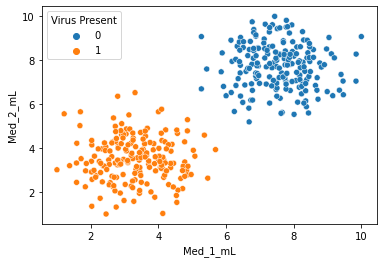

In [3]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present')

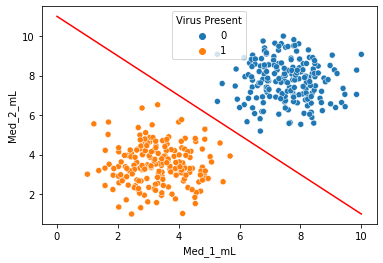

In [4]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present')
x = np.linspace(0, 10, 100)
m = -1
b = 11

y = m * x + b

plt.plot(x, y, 'r')

In [5]:
from sklearn.svm import SVC
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [6]:
X = df.drop(['Virus Present'], axis=1)
y = df['Virus Present']

In [7]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [8]:
from svm_margin_plot import plot_svm_boundary

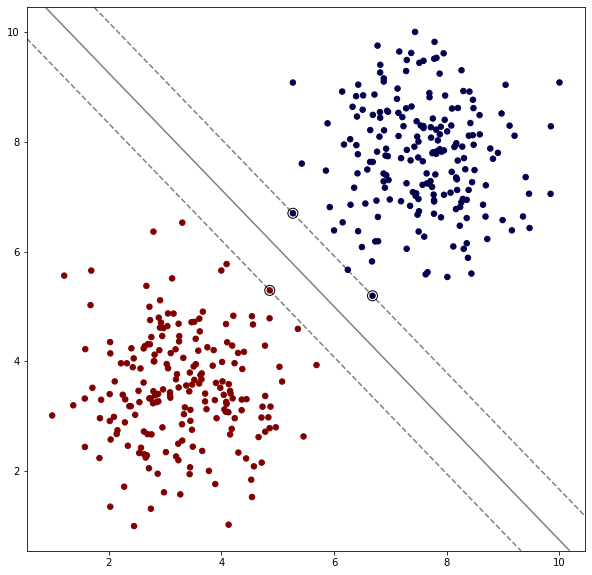

In [9]:
plot_svm_boundary(model, X, y)

In [10]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)


SVC(C=0.05, kernel='linear')

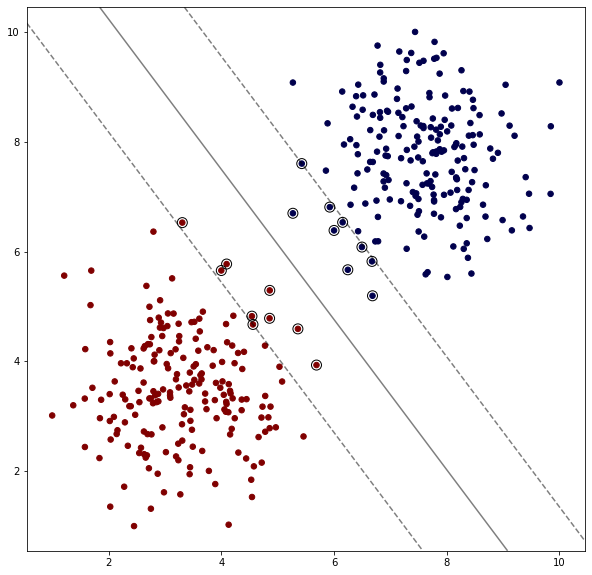

In [11]:
plot_svm_boundary(model, X, y)

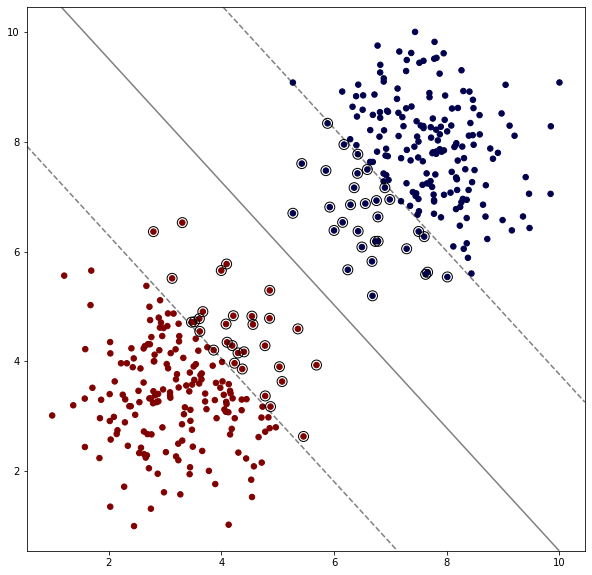

In [12]:
model = SVC(kernel='linear', C=0.005)
model.fit(X, y)
plot_svm_boundary(model, X, y)

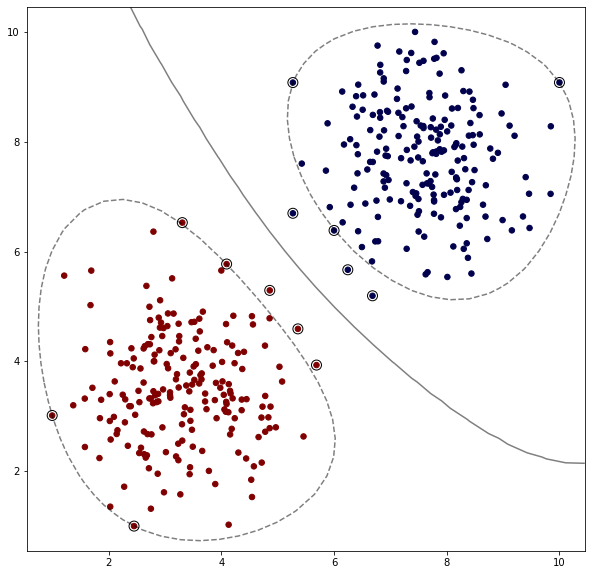

In [13]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

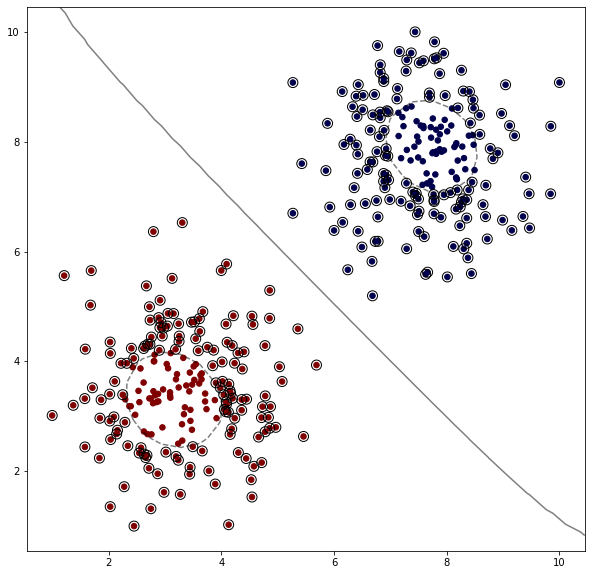

In [14]:
model = SVC(kernel='rbf', C=0.01)
model.fit(X, y)
plot_svm_boundary(model, X, y)

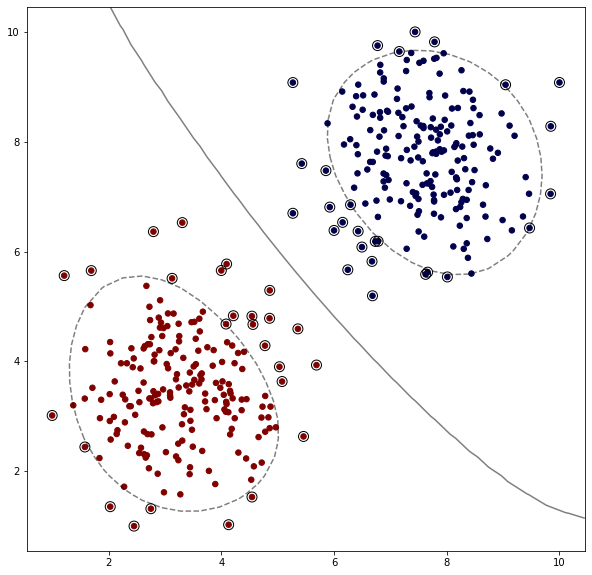

In [15]:
model = SVC(kernel='rbf', C=0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

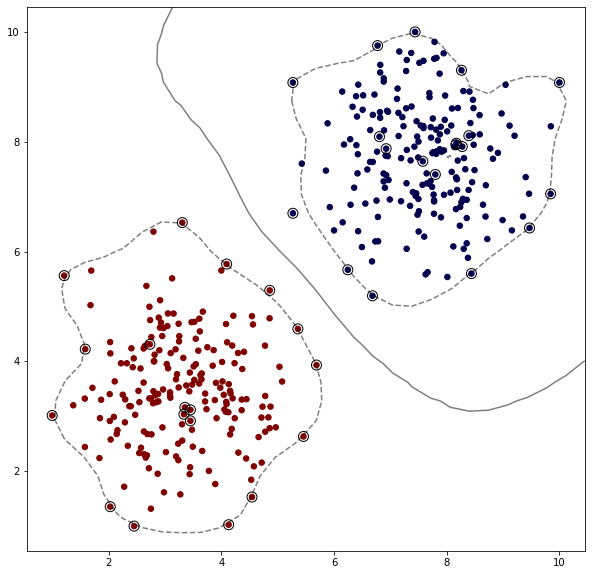

In [16]:
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X, y)
plot_svm_boundary(model, X, y)

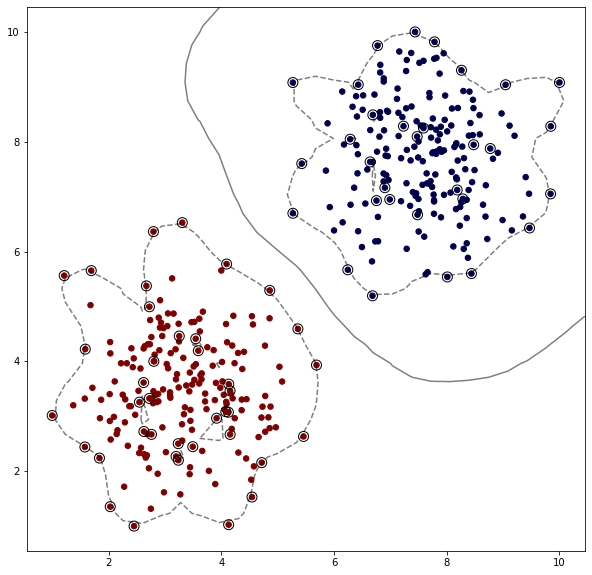

In [17]:
model = SVC(kernel='rbf', C=1, gamma=0.9)
model.fit(X, y)
plot_svm_boundary(model, X, y)

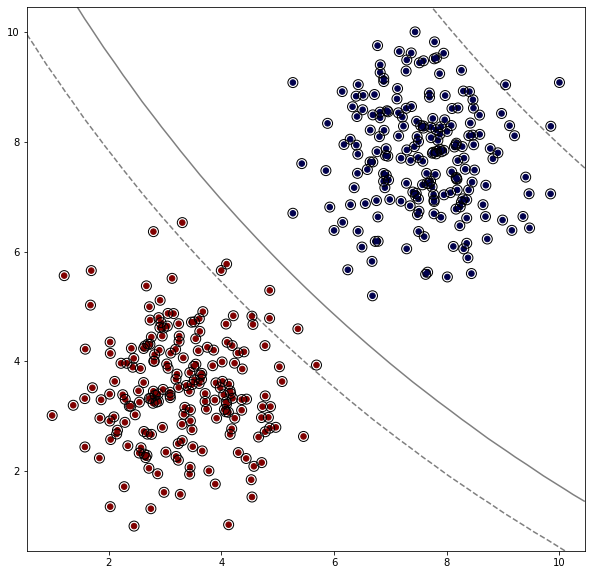

In [18]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model, X, y)

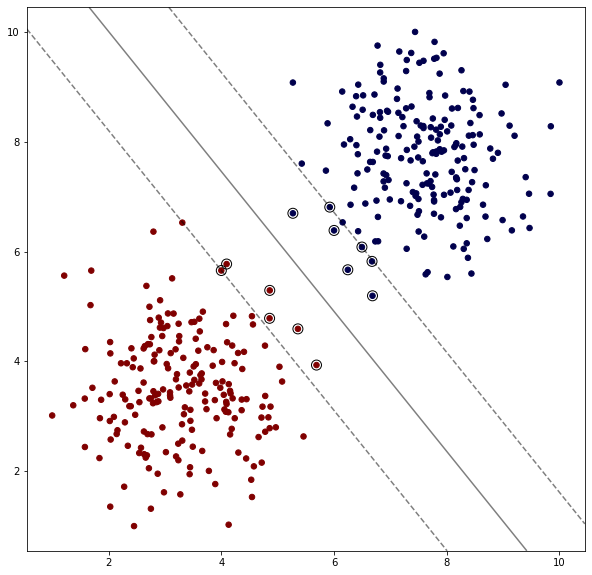

In [19]:
model = SVC(kernel='poly', degree=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

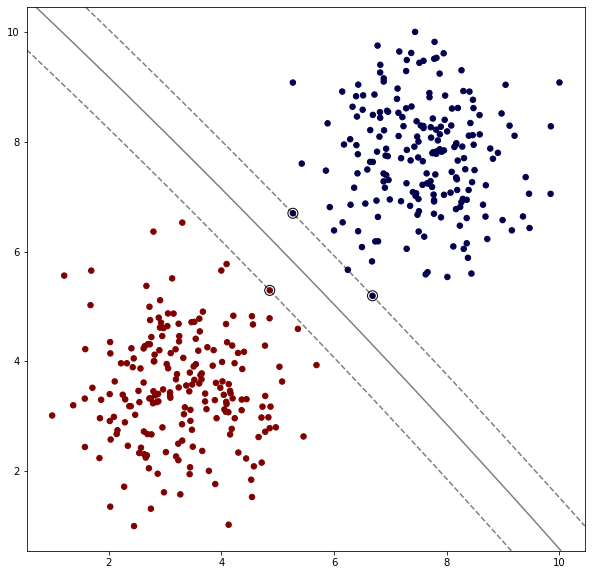

In [20]:
model = SVC(kernel='poly', degree=2)
model.fit(X, y)
plot_svm_boundary(model, X, y)

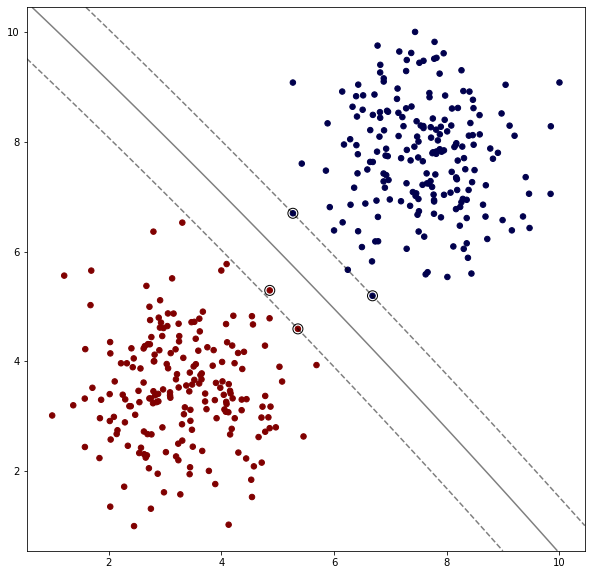

In [21]:
model = SVC(kernel='poly', degree=2, C=0.5)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

In [24]:
grid = GridSearchCV(svm, param_grid)

In [25]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [26]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [27]:
df = pd.read_csv("./cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


<AxesSubplot:>

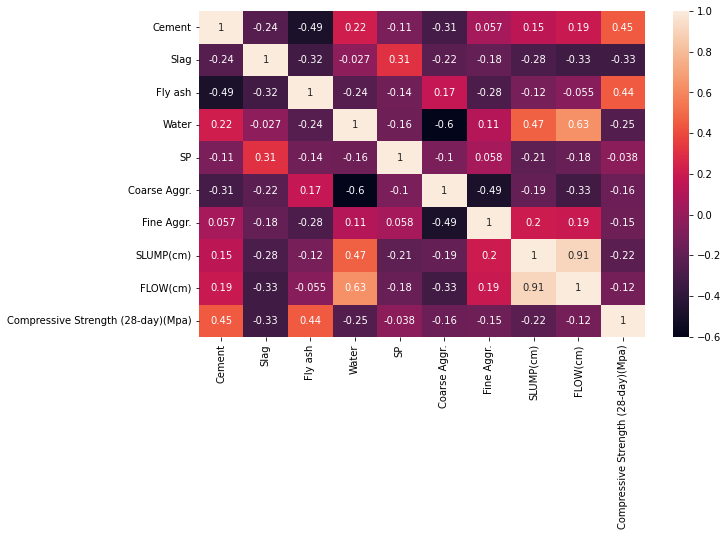

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

In [30]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [31]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [34]:
from sklearn.svm import SVR, LinearSVR

In [35]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies th

In [36]:
svr = SVR()
svr.fit(scaled_X_train, y_train)

SVR()

In [37]:
y_pred = svr.predict(scaled_X_test)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_absolute_error(y_test, y_pred)

5.236902091259179

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.695914838327134

In [40]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto'], 'degree': [2, 3, 4], 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [41]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), param_grid)

grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [42]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [43]:
grid_pred = grid.predict(scaled_X_test)

In [44]:
mean_absolute_error(y_test, grid_pred)

2.512801221076172

In [45]:
np.sqrt(mean_squared_error(y_test, grid_pred))

3.178210305119806